In [14]:
import numpy as np
import h5py, yaml
import sys, os
import calc_temperature
import byerlee

layers =[]


with open('structure_cfg.yaml', 'r') as fid:
    lines = fid.read()
    cfg   = yaml.load(lines, Loader=yaml.FullLoader)
    gen_dict = cfg['general_dict']
    for dic in cfg.keys():
        if dic.find('layer') == 0:
            layers.append(cfg[dic])

z = np.linspace(25,200,200)
Ts = 0+273
Ti = 1200+273
G  = 15
thid = 2
T = calc_temperature.calc_T(z, Ts, Ti, G, thid)

Text(0, 0.5, 'Depth(km)')

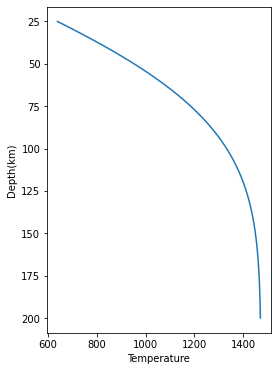

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,6))
plt.plot(T,z)
ax=plt.gca()
ax.invert_yaxis()
plt.xlabel('Temperature')
plt.ylabel('Depth(km)')

--------------------------
quartz PT92 2260.0 22.170600000000004 0 221706.00000000003
--------------------------
feldspar RD00Dd 2750 26.977500000000003 221706.00000000003 761256.0


Text(0, 0.5, 'Depth(km)')

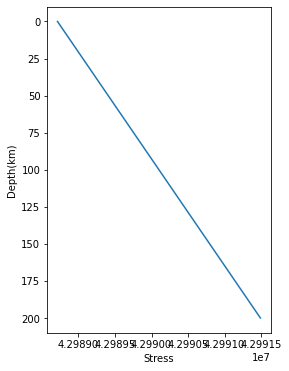

In [7]:
ztop = 0
zbot = 0
Pbot = 0
irh = 'PT92'
g   = 9.81
h5 = h5py.File('rock.h5', 'r')

for i in [0,1]:
    print('--------------------------')
    layer = layers[i]
    zbot = ztop + layer['thickness']
    Ptop = Pbot
    irock = layer['rock_id']
    irh  = layer['rheo']
    density = h5['{}/{}/rkdensity'.format(irock, irh)][()]
    rhog = density*1e-3*g
    Pbot = Ptop + layer['thickness']*rhog
    
    did = 3
    Wk  = 1
    S,f=byerlee.byerlee(3,2)
    Pressure = Ptop+(z-ztop)*rhog;
    s    = S+f*Pressure*Wk
    print(irock, irh, density, rhog, Ptop, Pbot)
    

h5.close()   

plt.figure(figsize=(4,6))
plt.plot(s,z)
ax=plt.gca()
ax.invert_yaxis()
plt.xlabel('Stress')
plt.ylabel('Depth(km)')

In [8]:
import pandas as pd
rock=pd.read_csv('rock.csv')
rock

,name,A,n,d,m,Coh,r,Q,V,ref,rock,rkdensity
0,HK03dd,1.100000e+05,3.50,0,0.0,0,0.00,530000.0,0.000018,"Hirth and Kohlstedt, 2003, dry olivine, disloc...",olivine,3320
1,HK03dw,1.600000e+03,3.50,0,0.0,0,1.20,520000.0,0.000022,"Hirth and Kohlstedt, 2003, wet olivine, disloc...",olivine,3320
2,HK03gd,1.500000e+09,1.00,0,3.0,0,0.00,375000.0,0.000010,"Hirth and Kohlstedt, 2003, dry olivine, diffus...",olivine,3320
3,HK03gw,2.500000e+07,1.00,0,3.0,0,1.00,375000.0,0.000020,"Hirth and Kohlstedt, 2003, wet olivine, diffus...",olivine,3320
4,HK03disGBS,6.500000e+03,3.50,0,2.0,0,0.00,400000.0,0.000000,"Hirth and Kohlstedt, 2003, dry olivine, dis-GBS",olivine,3320
5,HZK11disGBS,6.310000e+04,2.90,0,0.7,0,0.00,445000.0,0.000000,"Hansen, Zimmerman, and Kohlstedt, 2011, dry ol...",olivine,3320
6,MK00dw,1.584800e+03,3.00,0,0.0,0,0.98,470000.0,0.000020,"Mei and Kohlstedt, 2000, wet olivine, dislocat...",olivine,3320
7,MK00gw,5.011870e+04,1.00,0,3.0,0,1.00,295000.0,0.000020,"Mei and Kohlstedt, 2000, wet olivine, diffusio...",olivine,3320
8,FJ06,2.000000e+10,1.40,0,3.0,0,0.00,484000.0,0.000000,"Faul and Jackson, dry olivine, diffusion creep",olivine,3320
9,KJ03d,1.260000e+06,3.00,0,0.0,0,0.00,5100000.0,0.000014,"Karato and Jung, dry olivine, dislocation creep",olivine,3320


6.309573445 5.5 0 0.0 0 0.0 534000.0 1.0 0.0 8.31451


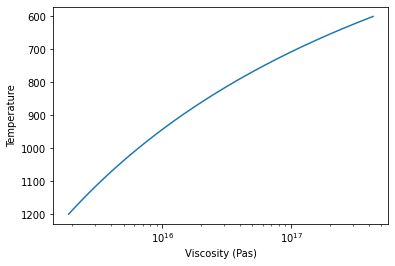

In [9]:
from rheology import flow_law
rock.iloc[0]
i = 43
R     = 8.31451
T = np.arange(600,1200)+273
print(rock.A[i], rock.n[i], rock.d[i], rock.m[i], rock.Coh[i], rock.r[i], rock.Q[i], 
              1e0, rock.V[i], R,)
rh = flow_law(rock.A[i], rock.n[i], rock.d[i], rock.m[i], rock.Coh[i], rock.r[i], rock.Q[i], 
              1e0, rock.V[i], R, T, epsilon=1e-15)
eta = rh.viscosity()
sigma = rh.GetSigma()
rh.plot_T_eta(T, eta)


In [89]:
i  = 2
z  = np.linspace(25,200,200)
Ts = 0+273
Ti = 1200+273
G  = 15
thid = 2

#print(rock.m[i], rock.d[i])
if rock.m[i] == 0 or rock.d[i] == 0:
    rock.d[i] == 10e3

T = calc_temperature.calc_T(z, Ts, Ti, G, thid)
rh = flow_law(rock.A[i], rock.n[i], rock.d[i], rock.m[i], rock.Coh[i], rock.r[i], rock.Q[i], 
              1e0, rock.V[i], R, T, epsilon=1e-15)
eta = rh.viscosity()
sigma = rh.GetSigma()
#print(eta)

/Users/zhao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  # Remove the CWD from sys.path while we load stuff.


Text(0, 0.5, 'Depth(km)')

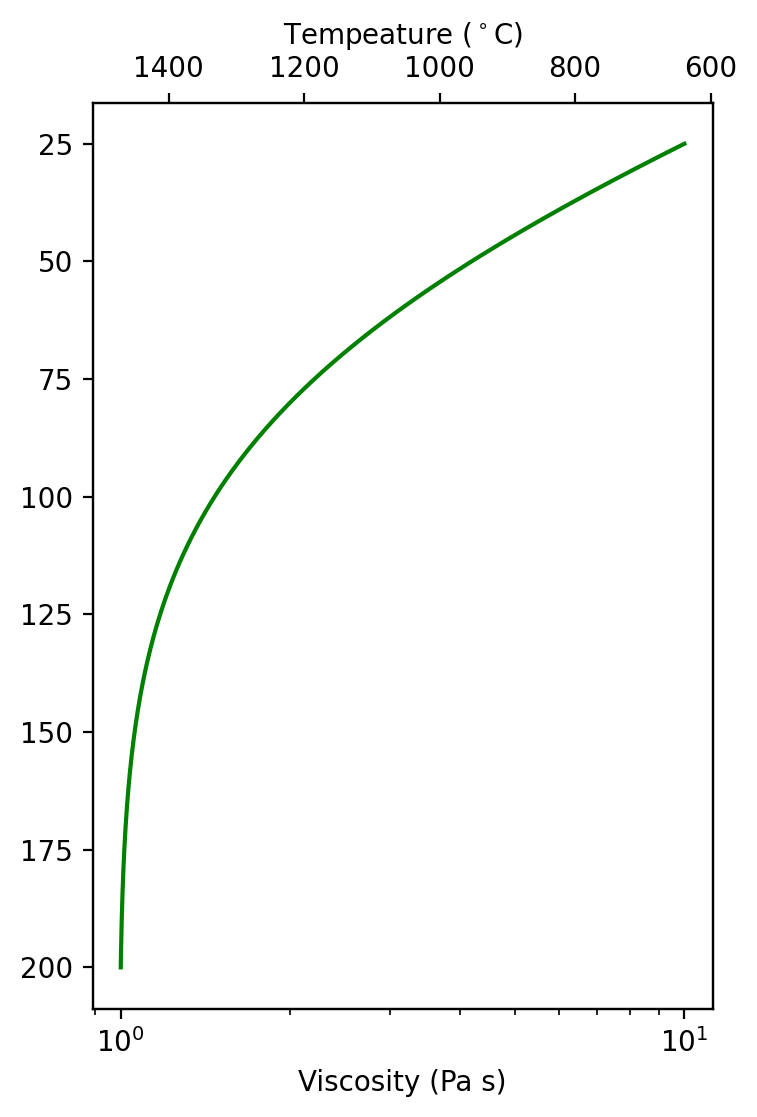

In [87]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']=200
plt.figure(figsize=(4,6))
plt.plot(eta,z)
ax=plt.gca()
p = ax.twiny()
p.plot(T,z, color='green')
p.invert_xaxis()
p.set_xlabel('Tempeature ($^\circ$C)')
ax.set_xscale('log')
ax.invert_yaxis()
ax.set_xlabel('Viscosity (Pa s)')
#plt.xlabel('Viscocity')
plt.ylabel('Depth(km)')